# A very short introduction to Numpy for Images and CV

- Minor Applied Artificial Intelligence, Hogeschool van Amsterdam (AUAS)
- Lecturers: Frank Aldershoff & Michiel Bontenbal 
- Date: Thursday February 9 2023

### Goal of this notebook
In this notebook we will use Numpy for images and computer vision. 

You will:
- learn how an image/video can be converted to data as a Numpy array.
- learn that Numpy array is a fast datatype that can be used for deep learning.


### Contents
0. Import modules
1. Convert images to Numpy arrays
2. Which one is faster? Numpy arrays vs python lists

----
### Sources & further reading:
 
**Python Data Science Handbook - Jake Vanderplas**

Chapter 2. Introduction to NumPy
- https://learning.oreilly.com/library/view/python-data-science/9781491912126/ch02.html#introduction-to-numpy

**Deep Learning with Python - Francois Chollet**
- https://learning-oreilly-com.rps.hva.nl/library/view/deep-learning-with/9781617296864/


### NumPy tutorials

You can start your learning journey by looking at the following material:
- https://numpy.org/devdocs/user/quickstart.html
- https://www.w3schools.com/python/numpy/default.asp

----
Acknowledgements: Stijn Oomes

## 0. Import modules

In [22]:
# Check your version of python
from platform import python_version
print(python_version())

3.10.9


In [23]:
#import numpy and check version
import numpy as np
print(np.__version__)

1.24.2


In [24]:
#import cv2 and check version
import cv2 
print(cv2.__version__)

4.7.0


In [25]:
#import Python Image Libary (PIL) and Matplotlib for working with images
from PIL import Image
from matplotlib import pyplot as plt

## 1. Convert images to numpy arrays

The following code is based on based on 'Deep Learning for Python' paragraph 2.2.

In this section we'll learn that images can be converted to data in the form of <i>tensors</i>.
If you've never heard about tensors before, you can think of them as a container for data. 
In Numpy tensors are called arrays. 

Tensors / arrays can come in different shapes, based on the number of dimensions.

<img src="https://cac.cornell.edu/myers/teaching/ComputationalMethods/python/anatomyarray.png" /> 

In [26]:
# CODE EXAMPLE 1: convert an integer to a numpy array
import numpy as np
a = np.array(12) #convert the integer 12 to a numpy array
print(a)
print(a.ndim) # print the numbers of dimensions

12
0


In the example above you see that the number of dimensions was zero, therefore it is called a rank-0 tensor and is known in maths as a 'scalar'. 

For deep learning we are interested in the following methods:
- ndim = number of dimensions
- shape = the shape of the array
- dtype = the datatype for example float32, float63 or uint.
- nbytes = the size of the array in bytes

and to check the datatype:
- type(a)

Look up all built-in methods with dir()

### EXERCISE 1
Print the type, shape, datatype and size of the array given in code example 1

In [27]:
#YOUR CODE HERE
print(a.ndim)
print(a.shape)
print(a.dtype)
print(a.nbytes)
print(type(a))

0
()
int64
8
<class 'numpy.ndarray'>


In the exercises below you will make tensors with one, two and three dimensions.

A list is an tensor with 1 dimension, it's also called a 'vector'.

### EXERCISE 2
Convert the python list to a Numpy array. Print it and print number of dimensions.

In [28]:
my_list = [2,5,6,7,10]
#YOUR CODE HERE
a = np.array(my_list)
print(a.ndim)

1


### EXERCISE 3:
A matrix is a 2D tensor. It consists of columns and rows.
Convert the matrix below to a numpy array and check the number of dimensions.

In [29]:
my_matrix = [[1,2,3],
            [4,5,6],
            [7,8,9]]

#YOUR CODE HERE
a = np.array(my_matrix)
print(a.ndim)

2


### Learn how to convert an image to a Numpy array

To convert an image to a numpy array and show it on the screen we will use three modules: 
1. PIL or Python Image Library, a module for images
2. Matplotlib, a widely used plotting libary for plotting the images
3. Numpy

In [30]:
# CODE EXAMPLE 2: Convert an image to an array an plot it

#import the modules
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

#open image an convert to numpy array
img = Image.open('../../../data/istockphoto-1368965646-170667a.jpg')  # select a .jpg image from the web/your pc 
a = np.asarray(img)

#show the image and shape
#plt.imshow(a)
print(f'Shape: {a.shape}')

Shape: (339, 509, 3)


### Exercise 4: get RGB values
Look up 'array indexing' in one of the tutorials.
Print the RGB values of pixel (100,200)

In [31]:
#YOUR CODE HERE
print(a[100,200])

[239 177 152]


Bonus: can you change the value of this pixel to black? Print the result.

In [32]:
#YOUR CODE HERE


### EXERCISE 5: Flip the image
Look up the numpy method flip(), fliplr() and flipud().

5a: Flip the image left-right and show it using matplotlib <br>
5b: Flip the image up-down and show it using matplotlib.

5c. Convert the image back with PIL and save it as a .jpg.
(Look up PIL documentation to do this)

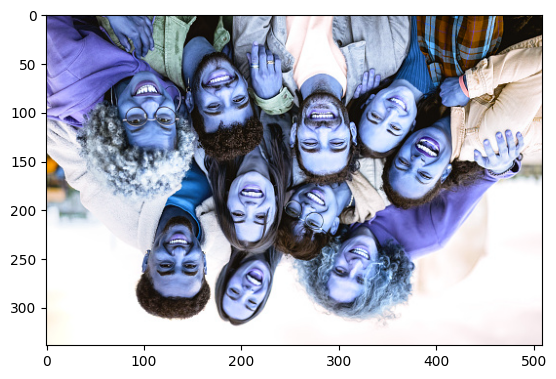

In [33]:
#YOUR CODE HERE
a = np.asarray(img)
d = np.flip(a)
b = np.fliplr(a)
c = np.flipud(a)
plt.imshow(d)



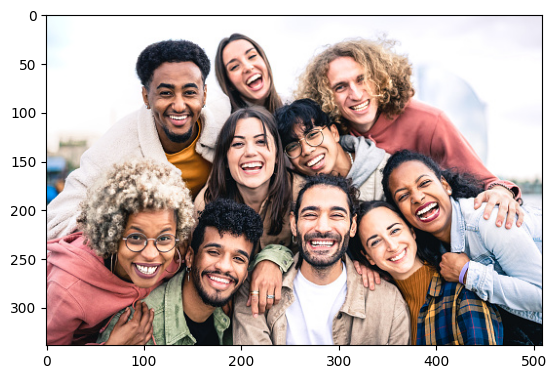

In [34]:
plt.imshow(b)

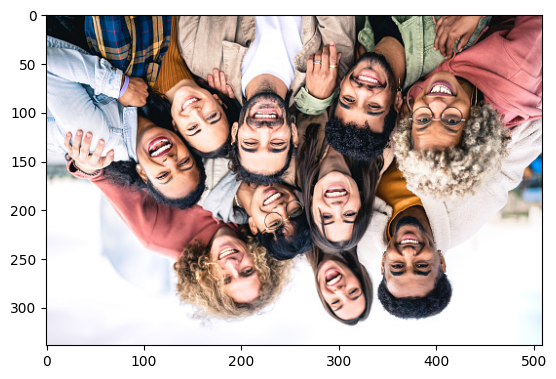

In [35]:
plt.imshow(c)

What you've done in the last exercise is also called 'image data augmentation'. This is a way to make your dataset larger if you have a limited number of images.

## 2. Which one is faster? Numpy arrays vs Python lists

### Measure execution time
First, let's discover two ways of measuring execution time>

In [36]:
#let's create a list using the random module and calculate the sum
import random
my_list = [random.random() for i in range(0, 10000000)]
print(sum(my_list)) #the sum of all the numbers 



5000977.281956503


In [37]:
print(np.sum([range(0, 10000000)]))
#numpy is sneller

49999995000000


### Exercise 6: 
Write a short script that:
- get time of the start
- calculates the sum of the list
- get the time of the end
- calculate length of the script by distracting starttime from endtime.

Hint: `import time`

In [38]:
#YOUR CODE HERE
import time
import random
# record start time
print("numpy "   )
start = time.time()

print(np.sum([range(0, 10000000)]))
# record end time
end = time.time()

print(end - start)

print("list ")
start = time.time()
my_list = []
for i in range(0, 10000000):
    my_list.append(i)

print(sum(my_list))

end = time.time()

print(end - start)

numpy 
49999995000000
0.3830530643463135
list 
49999995000000
0.5557863712310791


Fortunately there is an easier way, you can use Jupyter Notebook Cell magic %%timeit to measure cell execution time. 
See the example below.

In [39]:
%%timeit 
sum(my_list)

30.1 ms ± 266 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### 2b. Compare Numpy array with Python list 

The code example makes clear that a numpy array is faster than a python list. 
Read the code carefully and learn what happens. 

Change the value of the variable 'max_value' so you can learn what happens. 

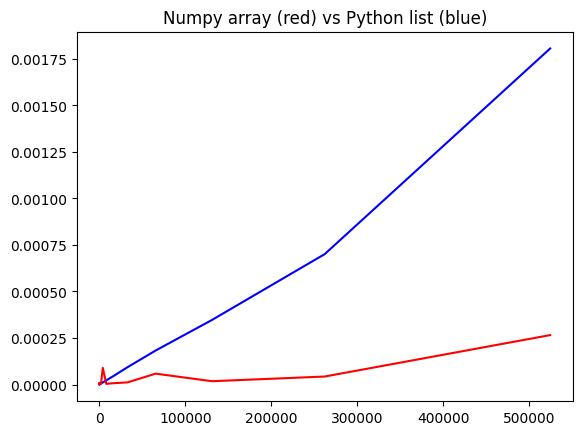

In [40]:
#CODE EXAMPLE 3
# a script to compare numpy arrays with python lists
import random
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer

n = 1
max_value = 1_000_000 #change to 5, 10 or 50 million.

timings_python_list = {}
timings_numpy_array = {}

while n <= max_value:
    python_list = [random.random() for i in range(0, n)]
    numpy_array = np.random.randint(255, size=n)

    # Time python list sum.
    start = timer()
    sum(python_list)
    end = timer()
    timings_python_list[n] = (end - start)
    # Time numpy array sum.
    start = timer()
    numpy_array.sum()
    end = timer()
    timings_numpy_array[n] = (end - start)

    n *= 2

plt.plot(timings_python_list.keys(), timings_python_list.values(),'b') #blue: the time of python list
plt.plot(timings_numpy_array.keys(), timings_numpy_array.values(),'r') #red: the time of numpy array
plt.title('Numpy array (red) vs Python list (blue)')
plt.show()

## Homework for next week: But what is a neural network?

Watch the video. It's a really great introduction to what we'll do next week. 
Next week we will take a deeper look into the MNIST dataset of written numbers.

In [41]:
import IPython
IPython.display.YouTubeVideo('aircAruvnKk')